<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Inspection" data-toc-modified-id="Inspection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Inspection</a></span><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#CSVs-and-Preprocessing" data-toc-modified-id="CSVs-and-Preprocessing-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>CSVs and Preprocessing</a></span></li><li><span><a href="#Holidays" data-toc-modified-id="Holidays-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Holidays</a></span><ul class="toc-item"><li><span><a href="#Sales" data-toc-modified-id="Sales-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Sales</a></span></li><li><span><a href="#Pre_R" data-toc-modified-id="Pre_R-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Pre_R</a></span></li></ul></li></ul></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Prophet" data-toc-modified-id="Prophet-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prophet</a></span><ul class="toc-item"><li><span><a href="#Inspecting-models" data-toc-modified-id="Inspecting-models-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Inspecting models</a></span></li><li><span><a href="#Formulating-predictions" data-toc-modified-id="Formulating-predictions-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Formulating predictions</a></span></li><li><span><a href="#Residuals" data-toc-modified-id="Residuals-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Residuals</a></span></li></ul></li><li><span><a href="#Final-Models" data-toc-modified-id="Final-Models-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Final Models</a></span><ul class="toc-item"><li><span><a href="#Residual-fitting" data-toc-modified-id="Residual-fitting-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Residual fitting</a></span></li></ul></li></ul></div>

# Inspection

## Libraries

In [732]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from datetime import datetime
rcParams["figure.figsize"] = 10, 6

import warnings
warnings.filterwarnings("ignore")

import fbprophet

import plotly.graph_objs as go
import plotly as py
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


In [733]:
# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


## CSVs and Preprocessing

In [734]:
#stores = pd.read_csv("../data/store.csv", low_memory=False)
#stores.head()

In [735]:
train = pd.read_csv("../data/train.csv", low_memory=False)
train['Date'] = pd.to_datetime(train['Date'])
#train.set_index('Date', inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [736]:
train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [737]:
#creating timeseries of date

train = train.groupby('Date').sum()
#sales = sales.to_frame()
train.reset_index(inplace = True)
sales = train.drop(columns = ['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'SchoolHoliday'])

sales.columns=['ds','y'] 
sales.head()

,ds,y
0,2013-01-01,97235
1,2013-01-02,6949829
2,2013-01-03,6347820
3,2013-01-04,6638954
4,2013-01-05,5951593


In [738]:
sales_m = sales.copy()

sales_m['ds'] = sales_m['ds'].apply(lambda x: x.strftime('%Y-%m'))
sales_m['ds'] = pd.to_datetime(sales_m['ds'])

sales_m = sales_m.groupby('ds').sum()
sales_m.reset_index(inplace = True)

sales_m.columns=['ds','y'] 
sales_m.head()


,ds,y
0,2013-01-01,180132207
1,2013-02-01,171534275
2,2013-03-01,201180369
3,2013-04-01,183431432
4,2013-05-01,185411063


In [739]:
indexed_sales_m = sales_m.set_index('ds')
Pre_R_m = indexed_sales_m.loc['2012-12-30':'2014-06-30']
Pre_R_m.reset_index(inplace = True)
Pre_R_m


,ds,y
0,2013-01-01,180132207
1,2013-02-01,171534275
2,2013-03-01,201180369
3,2013-04-01,183431432
4,2013-05-01,185411063
5,2013-06-01,180702351
6,2013-07-01,208843882
7,2013-08-01,198042727
8,2013-09-01,178053963
9,2013-10-01,187662330


In [740]:
indexed_sales = sales.set_index('ds')
Pre_R = indexed_sales.loc['2013-01-01':'2014-06-30']
Pre_R.reset_index(inplace = True)
Pre_R


,ds,y
0,2013-01-01,97235
1,2013-01-02,6949829
2,2013-01-03,6347820
3,2013-01-04,6638954
4,2013-01-05,5951593
...,...,...
541,2014-06-26,5802491
542,2014-06-27,6910940
543,2014-06-28,6586535
544,2014-06-29,257513


## Holidays

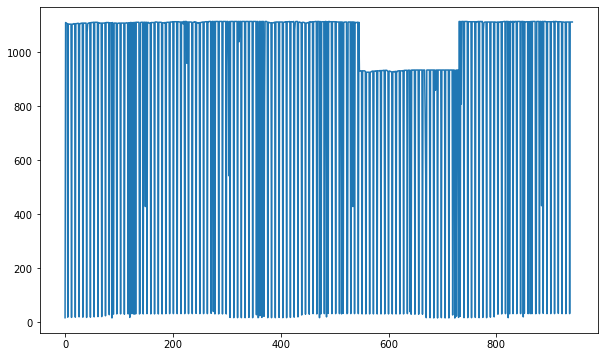

In [741]:
plt.plot(train['Open'])

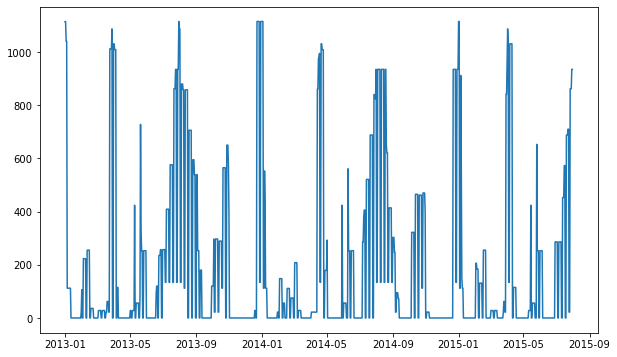

In [742]:
train = train.groupby('Date').sum()
#sales = sales.to_frame()
train.reset_index(inplace = True)
season = train.drop(columns = ['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'Sales'])

season.columns=['ds','y'] 
season_indexed = season.copy()
season_indexed['ds'] = pd.to_datetime(season_indexed['ds'])
season_indexed.set_index('ds', inplace=True)
season_indexed.head()

plt.plot(season_indexed)

### Sales

In [743]:
holidays = season[season['y'] > 0]
holidays.reset_index(inplace=True, drop = True)
holidays.columns= ['ds','holiday']
list_holidays = holidays["holiday"].to_list()
binned_holidays = []
for i in list_holidays:
    if i < 251:
        binned_holidays.append('250')
    if i > 250 and i < 501:
        binned_holidays.append('500')
    if i > 500 and i < 751:
        binned_holidays.append('750')
    if i > 750:
        binned_holidays.append('1000')
binned_holidays

holidays["holiday"] = binned_holidays

schools = holidays.copy()

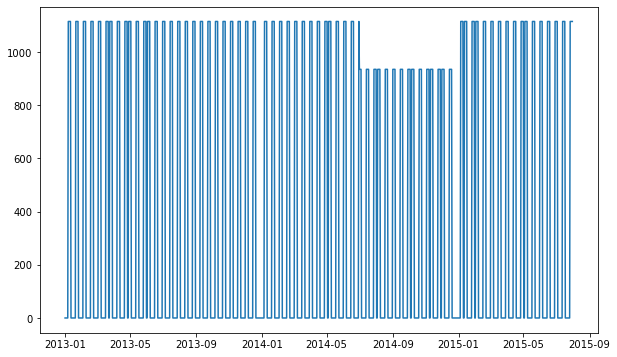

In [744]:
train = train.groupby('Date').sum()
#sales = sales.to_frame()
train.reset_index(inplace = True)
promo = train.drop(columns = ['Store', 'DayOfWeek', 'Customers', 'Open', 'SchoolHoliday',
       'Sales'])

promo.columns=['ds','y'] 
promo_indexed = promo.copy()
promo_indexed['ds'] = pd.to_datetime(promo_indexed['ds'])
promo_indexed.set_index('ds', inplace=True)
promo_indexed.head()

plt.plot(promo_indexed)

In [745]:
promo = promo[promo['y'] > 0]
promo.reset_index(inplace=True, drop = True)
promo.columns= ['ds','holiday']
list_promo = promo["holiday"].to_list()
binned_promo = []
for i in list_promo:
    if i > 0:
        binned_promo.append('promo')


promo["holiday"] = binned_promo

In [746]:
promo

,ds,holiday
0,2013-01-07,promo
1,2013-01-08,promo
2,2013-01-09,promo
3,2013-01-10,promo
4,2013-01-11,promo
...,...,...
355,2015-07-27,promo
356,2015-07-28,promo
357,2015-07-29,promo
358,2015-07-30,promo


In [747]:
holidays = pd.concat((holidays, promo))
holidays

,ds,holiday
0,2013-01-01,1000
1,2013-01-02,1000
2,2013-01-03,1000
3,2013-01-04,1000
4,2013-01-05,250
...,...,...
355,2015-07-27,promo
356,2015-07-28,promo
357,2015-07-29,promo
358,2015-07-30,promo


In [748]:
#pd.date_range(start="2015-08-01",end="2015-02-31",closed='right')
import datetime

start = datetime.datetime.strptime("2015-08-01", "%Y-%m-%d")
end = datetime.datetime.strptime("2016-01-01", "%Y-%m-%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

dates_list = []
for date in date_generated:
    dates_list.append(date.strftime("%Y-%m-%d"))

dates_list

['2015-08-01',
 '2015-08-02',
 '2015-08-03',
 '2015-08-04',
 '2015-08-05',
 '2015-08-06',
 '2015-08-07',
 '2015-08-08',
 '2015-08-09',
 '2015-08-10',
 '2015-08-11',
 '2015-08-12',
 '2015-08-13',
 '2015-08-14',
 '2015-08-15',
 '2015-08-16',
 '2015-08-17',
 '2015-08-18',
 '2015-08-19',
 '2015-08-20',
 '2015-08-21',
 '2015-08-22',
 '2015-08-23',
 '2015-08-24',
 '2015-08-25',
 '2015-08-26',
 '2015-08-27',
 '2015-08-28',
 '2015-08-29',
 '2015-08-30',
 '2015-08-31',
 '2015-09-01',
 '2015-09-02',
 '2015-09-03',
 '2015-09-04',
 '2015-09-05',
 '2015-09-06',
 '2015-09-07',
 '2015-09-08',
 '2015-09-09',
 '2015-09-10',
 '2015-09-11',
 '2015-09-12',
 '2015-09-13',
 '2015-09-14',
 '2015-09-15',
 '2015-09-16',
 '2015-09-17',
 '2015-09-18',
 '2015-09-19',
 '2015-09-20',
 '2015-09-21',
 '2015-09-22',
 '2015-09-23',
 '2015-09-24',
 '2015-09-25',
 '2015-09-26',
 '2015-09-27',
 '2015-09-28',
 '2015-09-29',
 '2015-09-30',
 '2015-10-01',
 '2015-10-02',
 '2015-10-03',
 '2015-10-04',
 '2015-10-05',
 '2015-10-

In [749]:
promo[135:275]

,ds,holiday
135,2014-01-06,promo
136,2014-01-07,promo
137,2014-01-08,promo
138,2014-01-09,promo
139,2014-01-10,promo
...,...,...
270,2014-12-15,promo
271,2014-12-16,promo
272,2014-12-17,promo
273,2014-12-18,promo


In [750]:
schools[194:376]

,ds,holiday
194,2014-01-01,1000
195,2014-01-02,1000
196,2014-01-03,1000
197,2014-01-04,250
198,2014-01-05,250
...,...,...
371,2014-12-27,250
372,2014-12-28,250
373,2014-12-29,1000
374,2014-12-30,1000


In [751]:
holidays_15 = pd.concat((promo[135:275], schools[194:376]))
holidays_15['year'] = holidays_15['ds'].dt.year +1 
holidays_15['month'] = holidays_15['ds'].dt.month
holidays_15['day'] = holidays_15['ds'].dt.day
holidays_15['ds'] = pd.to_datetime(holidays_15[['year','month','day']])
holidays_15.drop(columns=['year','month','day'],inplace = True)
holidays_15

,ds,holiday
135,2015-01-06,promo
136,2015-01-07,promo
137,2015-01-08,promo
138,2015-01-09,promo
139,2015-01-10,promo
...,...,...
371,2015-12-27,250
372,2015-12-28,250
373,2015-12-29,1000
374,2015-12-30,1000


In [752]:
holidays_pred = pd.concat((holidays, holidays_15))
holidays_pred

,ds,holiday
0,2013-01-01,1000
1,2013-01-02,1000
2,2013-01-03,1000
3,2013-01-04,1000
4,2013-01-05,250
...,...,...
371,2015-12-27,250
372,2015-12-28,250
373,2015-12-29,1000
374,2015-12-30,1000


### Pre_R

In [753]:
season_Pre_R = season.set_index('ds')
holidays_Pre_R = season_Pre_R.loc['2012-12-30':'2014-06-30']
holidays_Pre_R.reset_index(inplace = True)
holidays_Pre_R.head()

,ds,y
0,2013-01-01,1114
1,2013-01-02,1115
2,2013-01-03,1040
3,2013-01-04,1040
4,2013-01-05,112


In [754]:


holidays_Pre_R = holidays_Pre_R[holidays_Pre_R['y'] > 0]
holidays_Pre_R.reset_index(inplace=True, drop = True)
holidays_Pre_R.columns= ['ds','holiday']
list_holidays_Pre_R = holidays_Pre_R["holiday"].to_list()
binned_holidays_Pre_R = []
for i in list_holidays_Pre_R:
    if i < 251:
        binned_holidays_Pre_R.append('250')
    if i > 250 and i < 501:
        binned_holidays_Pre_R.append('500')
    if i > 500 and i < 751:
        binned_holidays_Pre_R.append('750')
    if i > 750:
        binned_holidays_Pre_R.append('1000')
#    if i > 0:
#        binned_holidays_Pre_R.append('school')


binned_holidays_Pre_R

holidays_Pre_R["holiday"] = binned_holidays_Pre_R
holidays_Pre_R

,ds,holiday
0,2013-01-01,1000
1,2013-01-02,1000
2,2013-01-03,1000
3,2013-01-04,1000
4,2013-01-05,250
...,...,...
272,2014-06-16,500
273,2014-06-17,500
274,2014-06-18,500
275,2014-06-19,500


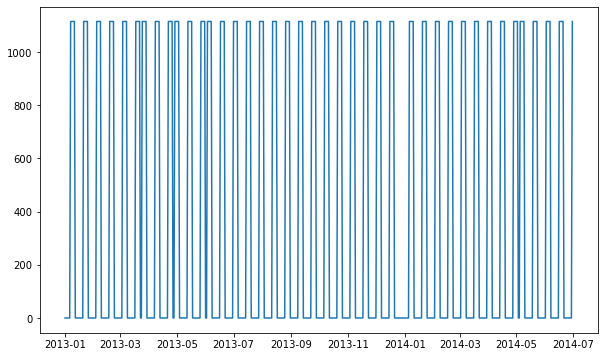

In [755]:
train = train.groupby('Date').sum()
#sales = sales.to_frame()
train.reset_index(inplace = True)
promo_Pre_R = train.drop(columns = ['Store', 'DayOfWeek', 'Customers', 'Open', 'SchoolHoliday',
       'Sales'])
promo_Pre_R = promo_Pre_R.set_index('Date')
promo_Pre_R = promo_Pre_R.loc['2012-12-30':'2014-06-30']
promo_Pre_R.reset_index(inplace = True)

promo_Pre_R.columns=['ds','y'] 
promo_Pre_R_indexed = promo_Pre_R.copy()
promo_Pre_R_indexed['ds'] = pd.to_datetime(promo_Pre_R_indexed['ds'])
promo_Pre_R_indexed.set_index('ds', inplace=True)
promo_Pre_R_indexed.head()

plt.plot(promo_Pre_R_indexed)


In [756]:
promo_Pre_R = promo_Pre_R[promo_Pre_R['y'] > 0]
promo_Pre_R.reset_index(inplace=True, drop = True)
promo_Pre_R.columns= ['ds','holiday']
list_promo_Pre_R = promo_Pre_R["holiday"].to_list()
binned_promo_Pre_R = []
for i in list_promo_Pre_R:
    if i > 0:
        binned_promo_Pre_R.append('promo')


promo_Pre_R["holiday"] = binned_promo_Pre_R

In [757]:
holidays_Pre_R = pd.concat((holidays_Pre_R, promo_Pre_R))
holidays_Pre_R

,ds,holiday
0,2013-01-01,1000
1,2013-01-02,1000
2,2013-01-03,1000
3,2013-01-04,1000
4,2013-01-05,250
...,...,...
196,2014-06-17,promo
197,2014-06-18,promo
198,2014-06-19,promo
199,2014-06-20,promo


# Functions

In [758]:
def Zero_maker(timeseries):
    list_modified = []
    
    if timeseries.columns == ['yhat']:
        timeseries_2 = timeseries.copy()
        lista = timeseries_2['yhat'].to_list()
        for i in lista:
            if i < 0:
                list_modified.append(0)
            else:
                list_modified.append(i)

        timeseries_2['yhat'] = list_modified
        
        
    elif timeseries.columns == ['y']:
        timeseries_2 = timeseries.copy()
        lista = timeseries_2['y'].to_list()
        for i in lista:
            if i < 0:
                list_modified.append(0)
            else:
                list_modified.append(i)

        timeseries_2['y'] = list_modified        
    
    
    else:
        print('Not y or yhat! Check column names.')
        
    return(timeseries_2)


In [759]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def performance_test(data, pred):

    # Model validation 
    ME_train = np.mean(data['y']-pred['yhat'])

    MAE_train = mean_absolute_error(data['y'],pred['yhat'])
    
    MSE_train = mean_squared_error(data['y'],pred['yhat'])

    RMSE_train = np.sqrt(MSE_train)

    MAPE_train = np.mean((np.abs(data['y']-pred['yhat']) / data['y'])* 100.)

    R2_train = r2_score(data['y'],pred['yhat'])

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train]})
    pd.options.display.float_format = '{:.2f}'.format


    #df_train = pd.DataFrame({'Real_value': data, 'Predicted_value': pred})

    return performance

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def zero_performance_test(data, pred):

    # Model validation 
    ME_train = np.mean(data['y']-Zero_maker(pred)['yhat'])

    MAE_train = mean_absolute_error(data['y'],Zero_maker(pred)['yhat'])
    
    MSE_train = mean_squared_error(data['y'],Zero_maker(pred)['yhat'])

    RMSE_train = np.sqrt(MSE_train)

    MAPE_train = np.mean((np.abs(data['y']-Zero_maker(pred)['yhat']) / data['y'])* 100.)

    R2_train = r2_score(data['y'],Zero_maker(pred)['yhat'])

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train]})
    pd.options.display.float_format = '{:.2f}'.format


    #df_train = pd.DataFrame({'Real_value': data, 'Predicted_value': pred})

    return performance

In [760]:
def Series_day_to_mon(Series):

    Series_m = Series.reset_index()
    Series_m['ds'] = pd.to_datetime(Series_m['ds'])

    Series_m['ds'] = Series_m['ds'].apply(lambda x: x.strftime('%Y-%m'))
    Series_m['ds'] = pd.to_datetime(Series_m['ds'])
    Series_m = Series_m.groupby('ds').sum()
    Series_m.reset_index(inplace = True)
    Series_m['ds'] = pd.to_datetime(Series_m['ds'])

    Series_m.set_index('ds', inplace=True)
    Series_m
    return Series_m

# Prophet

## Inspecting models

In [761]:
from fbprophet import Prophet

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


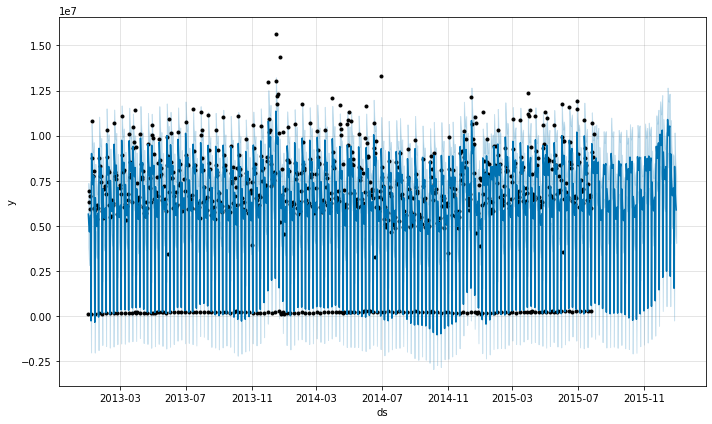

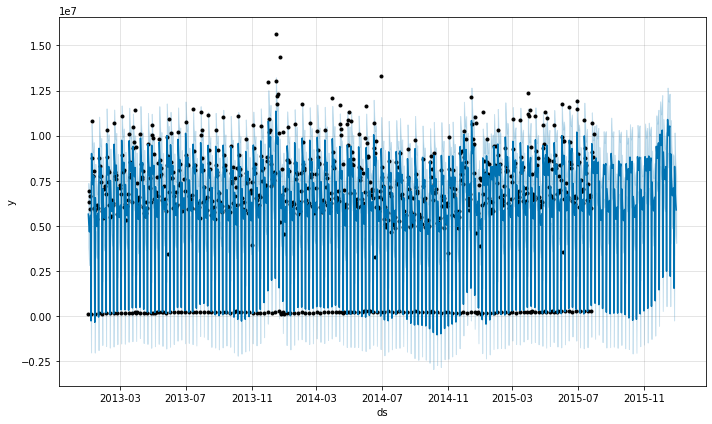

In [762]:
# Initializing Model
model_x = Prophet(yearly_seasonality=True, holidays=holidays_pred, holidays_prior_scale = 30)
#model_x.add_country_holidays(country_name='DE')
model_x.fit(sales)
future_dates_x = model_x.make_future_dataframe(periods = 153)
prediction_x = model_x.predict(future_dates_x)

model_x.plot(prediction_x)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


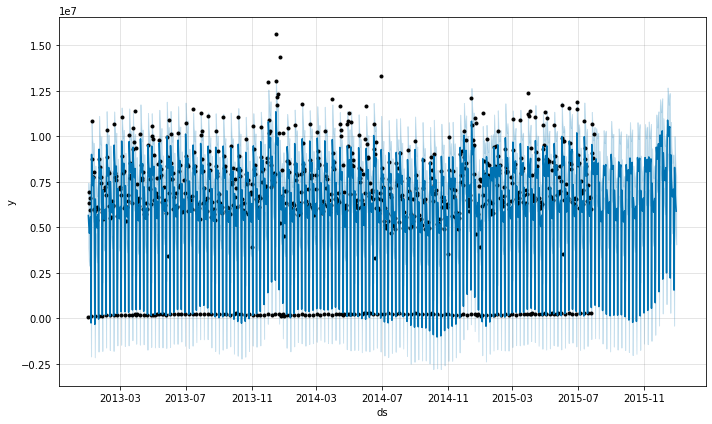

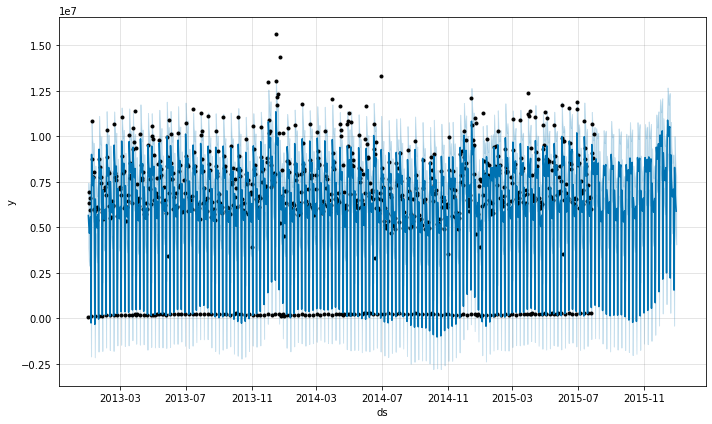

In [763]:
# Initializing Model
model_y = Prophet(yearly_seasonality=True, holidays=holidays_pred, holidays_prior_scale = 30)
#model_y.add_country_holidays(country_name='DE')
model_y.fit(sales)
future_dates_y = model_y.make_future_dataframe(periods = 153)
prediction_y = model_y.predict(future_dates_y)

model_y.plot(prediction_y)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


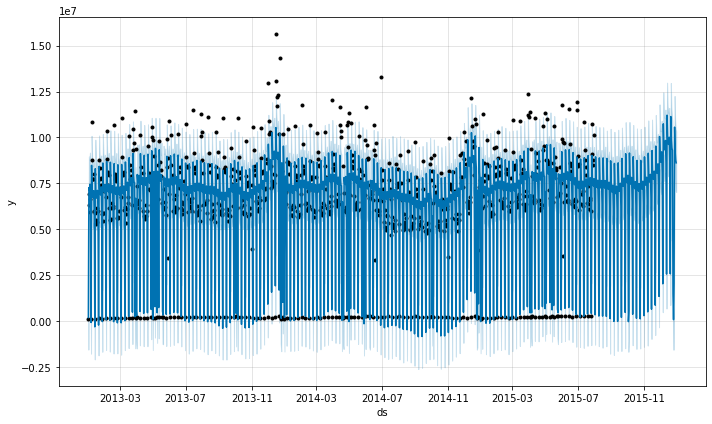

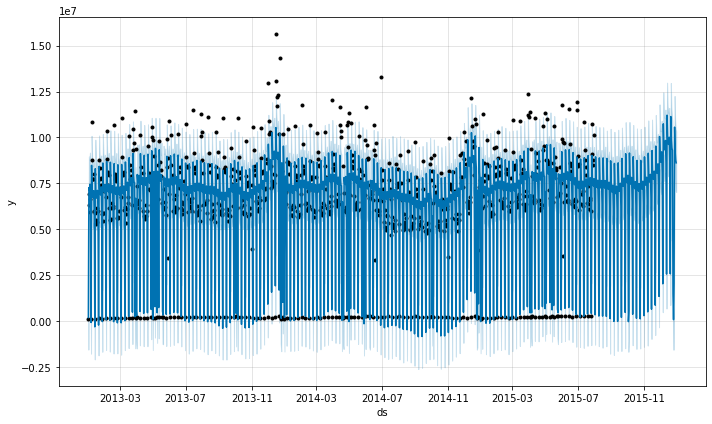

In [764]:
# Initializing Model
model_1 = Prophet(yearly_seasonality=True)
model_1.add_country_holidays(country_name='DE')
model_1.fit(sales)
future_dates_1 = model_1.make_future_dataframe(periods = 153)
prediction_1 = model_1.predict(future_dates_1)

model_1.plot(prediction_1)

In [765]:
prediction_1.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christi Himmelfahrt,Christi Himmelfahrt_lower,Christi Himmelfahrt_upper,Erster Mai,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,6148401.14,-1542564.20,1854871.25,6148401.14,6148401.14,0.00,0.00,0.00,0.00,...,1181727.36,1181727.36,1181727.36,403961.83,403961.83,403961.83,0.00,0.00,0.00,201024.60
1,2013-01-02,6150449.56,5558764.75,8969536.47,6150449.56,6150449.56,0.00,0.00,0.00,0.00,...,813959.33,813959.33,813959.33,307858.65,307858.65,307858.65,0.00,0.00,0.00,7272267.54
2,2013-01-03,6152497.97,5452118.46,8806837.00,6152497.97,6152497.97,0.00,0.00,0.00,0.00,...,761999.51,761999.51,761999.51,217075.68,217075.68,217075.68,0.00,0.00,0.00,7131573.17
3,2013-01-04,6154546.38,5772489.06,9175915.68,6154546.38,6154546.38,0.00,0.00,0.00,0.00,...,1169375.09,1169375.09,1169375.09,132562.70,132562.70,132562.70,0.00,0.00,0.00,7456484.17
4,2013-01-05,6156594.79,4392039.84,7768344.02,6156594.79,6156594.79,0.00,0.00,0.00,0.00,...,-115228.97,-115228.97,-115228.97,55120.77,55120.77,55120.77,0.00,0.00,0.00,6096486.59


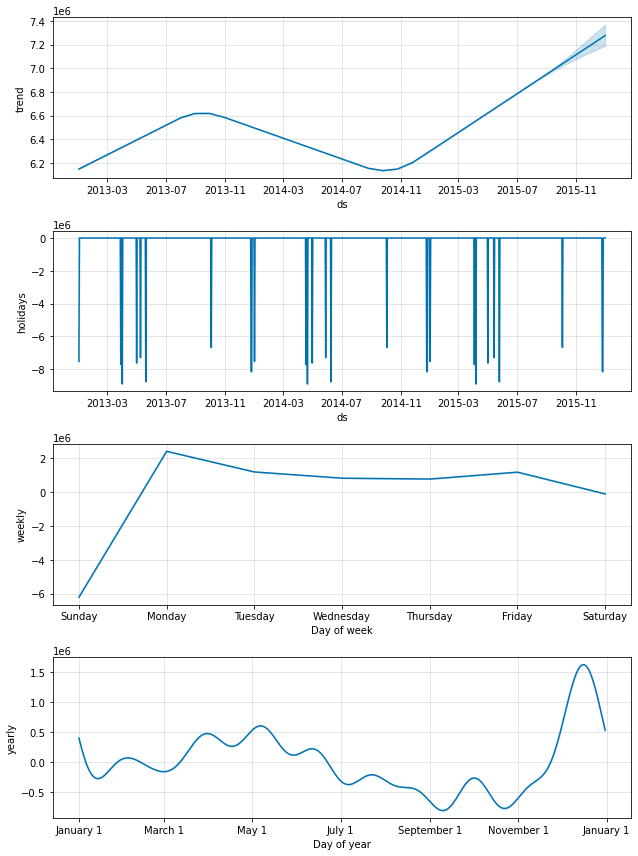

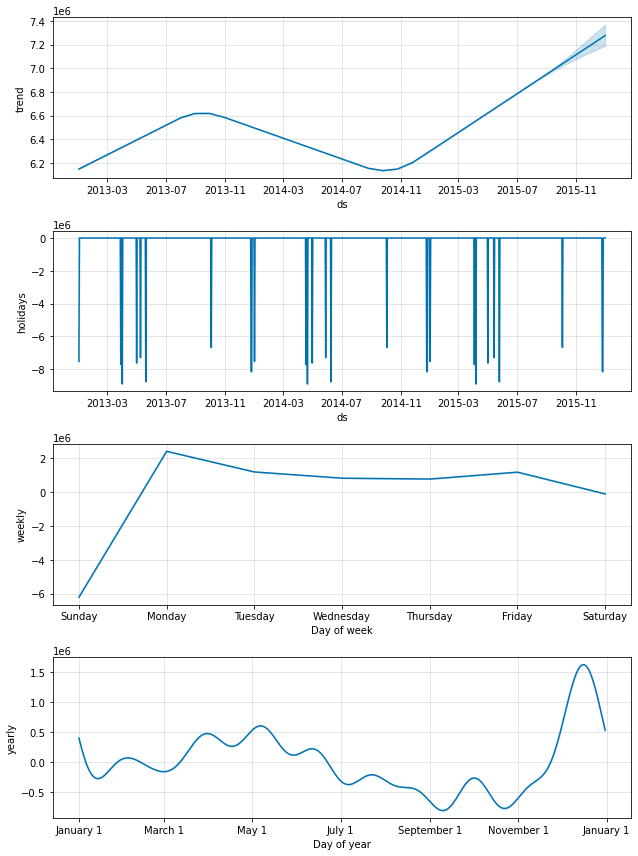

In [766]:
model_1.plot_components(prediction_1)

In [767]:
Pre_R

,ds,y
0,2013-01-01,97235
1,2013-01-02,6949829
2,2013-01-03,6347820
3,2013-01-04,6638954
4,2013-01-05,5951593
...,...,...
541,2014-06-26,5802491
542,2014-06-27,6910940
543,2014-06-28,6586535
544,2014-06-29,257513


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


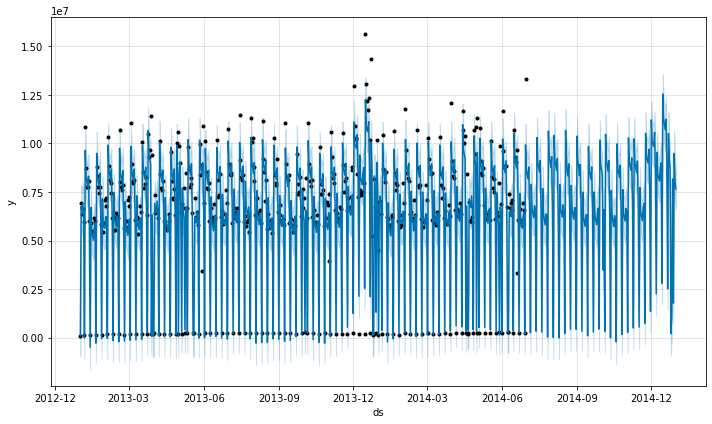

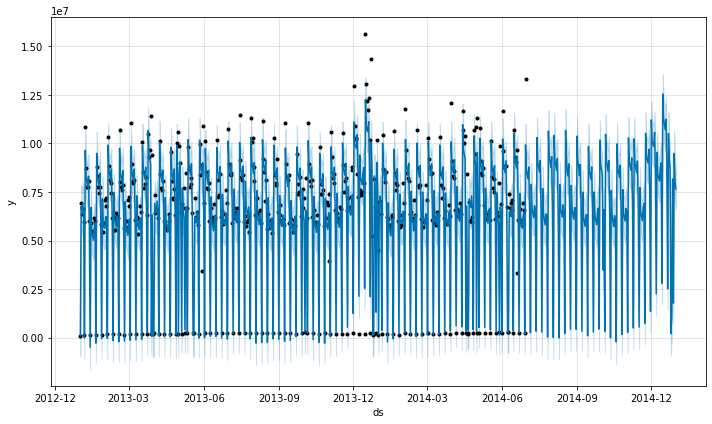

In [768]:
model_2 = Prophet(yearly_seasonality=True, holidays=holidays, holidays_prior_scale = 30)
model_2.add_country_holidays(country_name='DE')
model_2.fit(Pre_R)
future_dates_2 = model_2.make_future_dataframe(periods = 184)
prediction_2 = model_2.predict(future_dates_2)
model_2.plot(prediction_2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


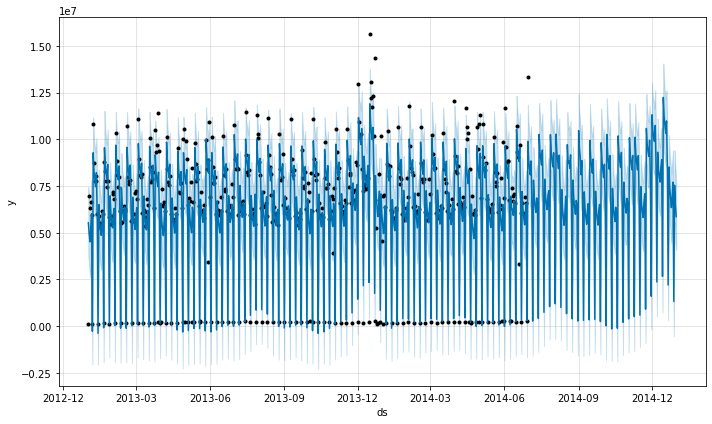

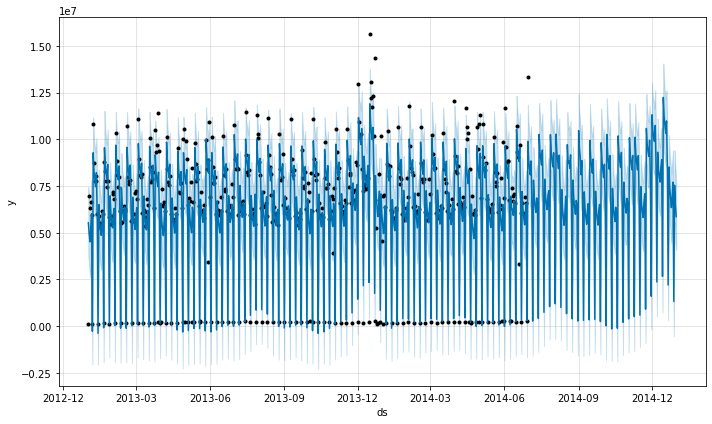

In [769]:
model_2 = Prophet(yearly_seasonality=True, holidays=holidays, holidays_prior_scale = 30)
#model_2.add_country_holidays(country_name='DE')
model_2.fit(Pre_R)
future_dates_2 = model_2.make_future_dataframe(periods = 184)
prediction_2 = model_2.predict(future_dates_2)
model_2.plot(prediction_2)

In [770]:
prediction_2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,1000,1000_lower,1000_upper,250,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,5060705.90,3758380.08,7447123.25,5060705.90,5060705.90,-426859.72,-426859.72,-426859.72,0.00,...,857504.11,857504.11,857504.11,42111.48,42111.48,42111.48,0.00,0.00,0.00,5533461.77
1,2013-01-02,5062915.01,3244608.47,6812411.71,5062915.01,5062915.01,-426859.72,-426859.72,-426859.72,0.00,...,387484.75,387484.75,387484.75,-63886.17,-63886.17,-63886.17,0.00,0.00,0.00,4959653.87
2,2013-01-03,5065124.12,2637590.43,6355078.17,5065124.12,5065124.12,-426859.72,-426859.72,-426859.72,0.00,...,33412.97,33412.97,33412.97,-158396.56,-158396.56,-158396.56,0.00,0.00,0.00,4513280.82
3,2013-01-04,5067333.24,3311406.88,7051115.27,5067333.24,5067333.24,-426859.72,-426859.72,-426859.72,0.00,...,784113.12,784113.12,784113.12,-240590.70,-240590.70,-240590.70,0.00,0.00,0.00,5183995.93
4,2013-01-05,5069542.35,4188656.73,7840783.82,5069542.35,5069542.35,0.00,0.00,0.00,74167.60,...,1183196.35,1183196.35,1183196.35,-309900.87,-309900.87,-309900.87,0.00,0.00,0.00,6017005.43


## Formulating predictions 

In [771]:

prediction_2_S = pd.concat([prediction_2['ds'], prediction_2['yhat']], axis=1).reset_index(drop=True)
prediction_2_S['ds'] = pd.to_datetime(prediction_2_S['ds'])
prediction_2_S.set_index('ds', inplace=True)
prediction_2_S = prediction_2_S.loc['2014-07-01':]
#prediction_2_S.reset_index(inplace = True)

prediction_2_S







prediction_1_S = pd.concat([prediction_1['ds'], prediction_1['yhat']], axis=1).reset_index(drop=True)
prediction_1_S['ds'] = pd.to_datetime(prediction_1_S['ds'])
prediction_1_S.set_index('ds', inplace=True)
prediction_1_S = prediction_1_S.loc['2015-08-01':]
#prediction_2_S.reset_index(inplace = True)

prediction_1_S_1 = pd.concat([prediction_1['ds'], prediction_1['yhat']], axis=1).reset_index(drop=True)
prediction_1_S_1['ds'] = pd.to_datetime(prediction_1_S_1['ds'])
prediction_1_S_1.set_index('ds', inplace=True)
prediction_1_S_1 = prediction_1_S_1.loc['2014-07-01':'2014-12-31']

##Used for monthly
prediction_1_S_m = pd.concat([prediction_1['ds'], prediction_1['yhat']], axis=1).reset_index(drop=True)
prediction_1_S_m['ds'] = pd.to_datetime(prediction_1_S_m['ds'])
prediction_1_S_m.set_index('ds', inplace=True)



sales_S = sales.set_index('ds')

sales_S

sales_m = Series_day_to_mon(sales_S)



sales_R = sales.set_index('ds')
sales_R = sales_R.loc['2014-07-01':'2014-12-31']




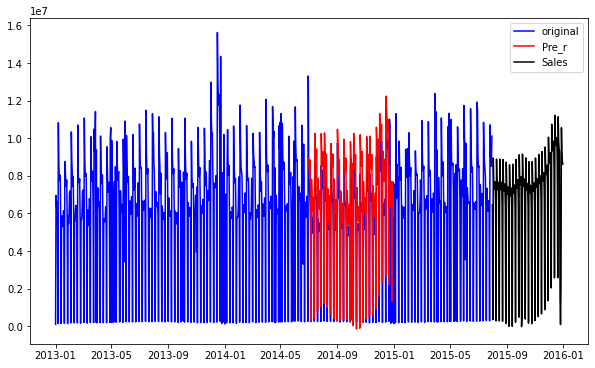

In [772]:

orig_plot = plt.plot(sales_S, color='blue', label='original')
Pre_R_plot = plt.plot(prediction_2_S, color='red', label='Pre_r')
Sales_plot = plt.plot(prediction_1_S, color='black', label='Sales')
plt.legend(loc="best")
plt.show(block = False)

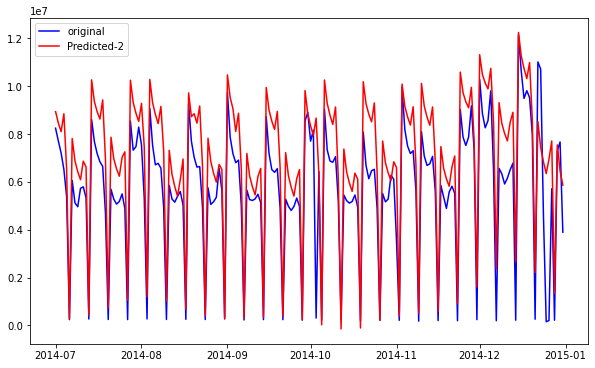

In [773]:
orig_plot = plt.plot(sales_R, color='blue', label='original')
Pre_R_plot = plt.plot(prediction_2_S, color='red', label='Predicted-2')
#Sales_plot = plt.plot(prediction_1_S_1, color='black', label='Predicted-1')
plt.legend(loc="best")
plt.show(block = False)



## Residuals

In [774]:
sales_train_pred = prediction_1['yhat'][0:942]
residual = sales['y'] - sales_train_pred

residual_indexed = sales.copy()
residual_indexed['y'] = residual.to_list()
residual_indexed

residual_indexed_S = residual_indexed.set_index('ds')
residual_indexed_S


,y
ds,
2013-01-01,-103789.60
2013-01-02,-322438.54
2013-01-03,-783753.17
2013-01-04,-817530.17
2013-01-05,-144893.59
...,...
2015-07-27,1681614.30
2015-07-28,1314636.28
2015-07-29,1077168.84


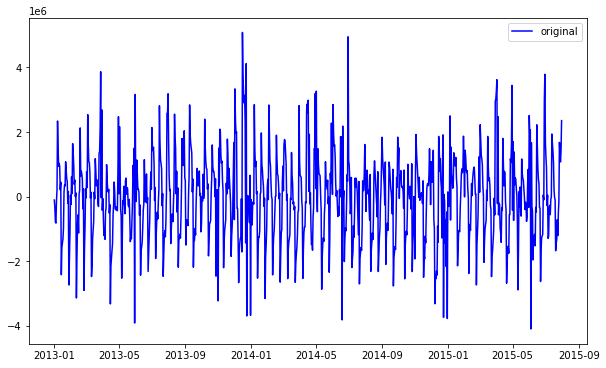

In [775]:
resid = plt.plot(residual_indexed_S, color='blue', label='original')
#Sales_plot = plt.plot(prediction_1_S_1, color='black', label='Predicted-1')
plt.legend(loc="best")
plt.show(block = False)

In [776]:
residual_m = residual_indexed.reset_index(drop=True)

residual_m['ds'] = residual_m['ds'].apply(lambda x: x.strftime('%Y-%m'))
residual_m['ds'] = pd.to_datetime(residual_m['ds'])
residual_m = residual_m.groupby('ds').sum()

In [777]:
###CSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSV###

#residual_indexed_S.to_csv("../data/residual.csv")
#residual_m.to_csv("../data/residual_m.csv")


###CSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSV###

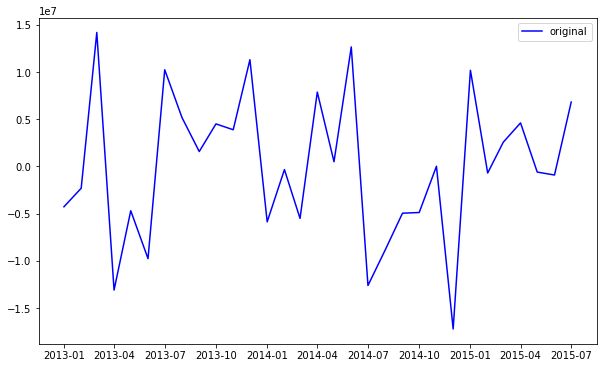

In [778]:
resid = plt.plot(residual_m, color='blue', label='original')
#Sales_plot = plt.plot(prediction_1_S_1, color='black', label='Predicted-1')
plt.legend(loc="best")
plt.show(block = False)

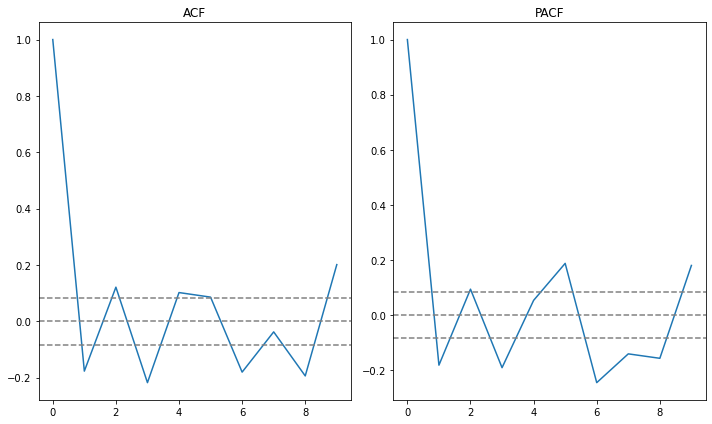

In [779]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(residual_m, nlags=9)
lag_pacf = pacf(residual_m, nlags=9, method='ols')

#plotting
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Pre_R)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(Pre_R)), linestyle='--', color='gray')
plt.title("ACF")


plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Pre_R)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(Pre_R)), linestyle='--', color='gray')
plt.title("PACF")
plt.tight_layout() 

# Final Models

plotting AR Model


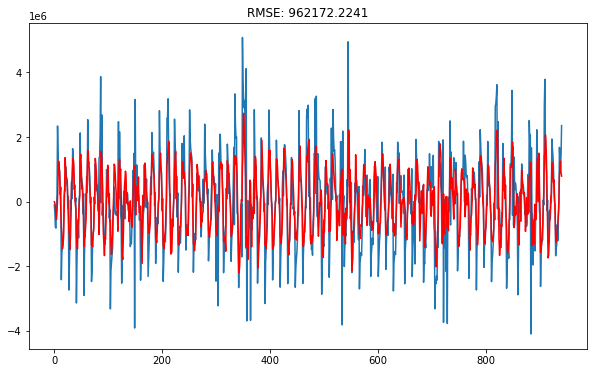

In [780]:
from statsmodels.tsa.arima_model import ARIMA

#AR | ARIMA Model
model_3 = ARIMA(residual, order=(20,0,0))
results_3 = model_3.fit()
plt.plot(residual)
plt.plot(results_3.fittedvalues, color="red")
plt.title('RMSE: %.4f'% np.sqrt(np.mean((results_3.fittedvalues - residual)**2)))
print('plotting AR Model')

## Residual fitting

In [781]:
resid_ = results_3.fittedvalues.to_list()
resid_pred = residual_indexed.copy()

resid_pred['y'] = resid_
#resid_pred.reset_index(inplace=True)
#resid_pred['ds'] = pd.to_datetime(resid_pred['ds'])

#resid_pred['ds'] = resid_pred['ds'].apply(lambda x: x.strftime('%Y-%m'))
#resid_pred['ds'] = pd.to_datetime(resid_pred['ds'])
#resid_pred = resid_pred.groupby('ds').sum()
#resid_pred.reset_index(inplace = True)
#resid_pred['ds'] = pd.to_datetime(resid_pred['ds'])

#resid_pred.columns=['ds','y'] 
resid_pred.set_index('ds', inplace=True)
resid_pred

,y
ds,
2013-01-01,-719.63
2013-01-02,-51728.76
2013-01-03,-146330.39
2013-01-04,-398564.67
2013-01-05,-550308.12
...,...
2015-07-27,811537.81
2015-07-28,1056474.38
2015-07-29,1255319.55


In [782]:
prediction_2_S_m = Series_day_to_mon(prediction_2_S)

prediction_1_S_m = Series_day_to_mon(prediction_1_S_m)
sales_R_m = Series_day_to_mon(sales_R)

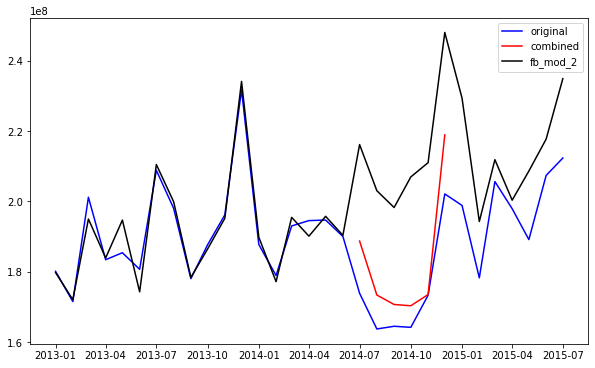

In [783]:
orig_plot = plt.plot(sales_m, color='blue', label='original')
#fb_plot = plt.plot(prediction_1_S_m, color='green', label='fb')
final_plot = plt.plot(Series_day_to_mon(final_pred['2014-07-01':'2014-12-31']), color='red', label='combined')
fb_plot = plt.plot(Series_day_to_mon(y_prediction_indexed), color='black', label='fb_mod_2')
#Sales_plot = plt.plot(prediction_1_S_1, color='black', label='Predicted-1')
plt.legend(loc="best")
plt.show(block = False)

In [784]:
alpha = [0,0.0002,0.0001,0.00021,0.00022,0.00024,0.00026,0.00028,0.0002, 0.01, 0.02, 0.05]
dfs = []
for alpha in alpha:
    dfs.append(((1-alpha)*prediction_1_S_m['yhat']) + (alpha * resid_pred_z['y'] ))
for df in dfs:
    print('RMSE: %.1f'% np.sqrt(np.mean((sales_m['y'] - df)**2)))

RMSE: 7748521.2
RMSE: 7748181.0
RMSE: 7748328.3
RMSE: 7748168.8
RMSE: 7748157.1
RMSE: 7748134.9
RMSE: 7748114.6
RMSE: 7748096.1
RMSE: 7748181.0
RMSE: 7952364.4
RMSE: 8573806.0
RMSE: 12113524.6


In [785]:

sales_indexed = sales.set_index('ds')

train_ = sales_indexed[:"2014-12-31"]
test_ = sales_indexed["2015-01-01":]

In [786]:
train_fixed = train_.copy()
train_fixed["2014-07-01":"2014-12-31"] = y_prediction_indexed["2014-07-01":"2014-12-31"]
train_fixed["2014-07-01":"2014-12-31"]


,y
ds,
2014-07-01,8926548.92
2014-07-02,8448183.22
2014-07-03,8087146.19
2014-07-04,8833702.32
2014-07-05,6498275.38
...,...
2014-12-27,7698637.16
2014-12-28,1320106.87
2014-12-29,7525810.98


In [787]:
train_fixed

,y
ds,
2013-01-01,97235.00
2013-01-02,6949829.00
2013-01-03,6347820.00
2013-01-04,6638954.00
2013-01-05,5951593.00
...,...
2014-12-27,7698637.16
2014-12-28,1320106.87
2014-12-29,7525810.98


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


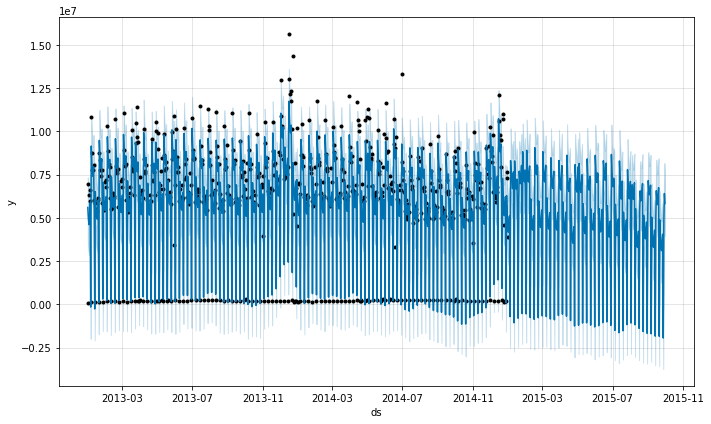

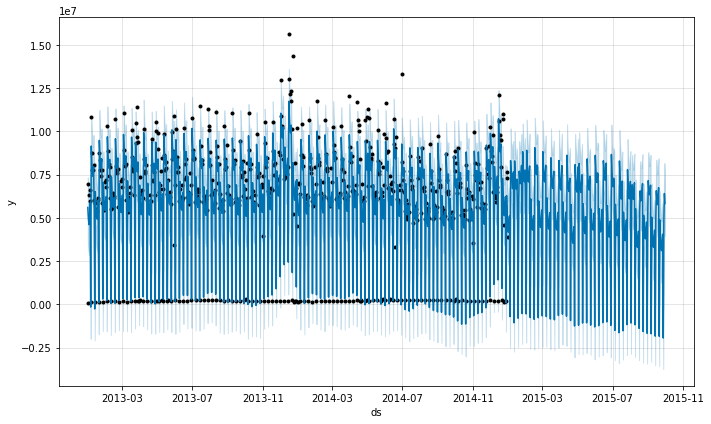

In [788]:
model_4 = Prophet(yearly_seasonality=True, holidays=holidays_pred, holidays_prior_scale = 30)
#model_4.add_country_holidays(country_name='DE')
model_4.fit(train_.reset_index())
future_dates_4 = model_4.make_future_dataframe(periods = len(y))
prediction_4 = model_4.predict(future_dates_4)
model_4.plot(prediction_4)

In [796]:
final_pred = prediction_2_S['yhat'] + resid_pred['2014-07-01':'2014-12-01']['y']
final_pred = final_pred.to_frame()
final_pred.columns = ['y']

,y
ds,
2014-07-01,11156303.56
2014-07-02,10438642.23
2014-07-03,8079226.70
2014-07-04,9838191.12
2014-07-05,6066546.71
...,...
2014-12-27,NaN
2014-12-28,NaN
2014-12-29,NaN


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


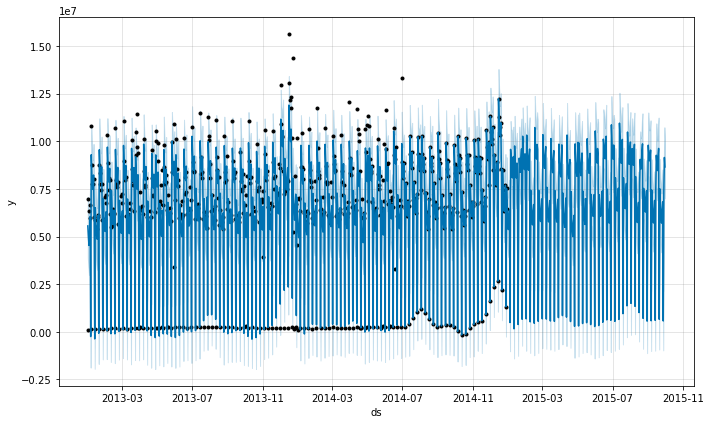

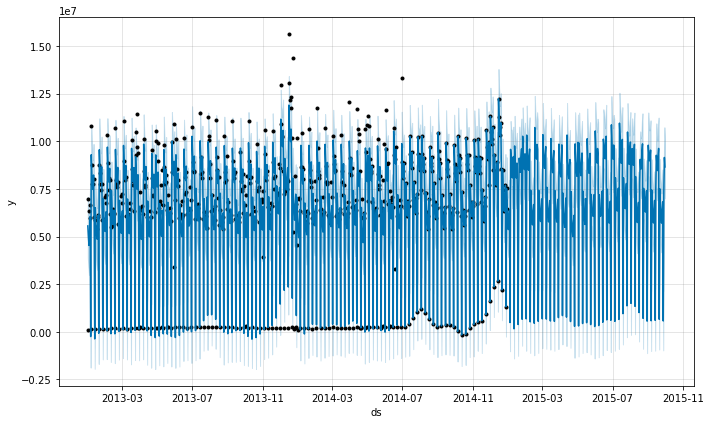

In [790]:
model_4 = Prophet(yearly_seasonality=True, holidays=holidays_pred, holidays_prior_scale = 20)
#model_4.add_country_holidays(country_name='DE')
model_4.fit(train_fixed.reset_index())
future_dates_4 = model_4.make_future_dataframe(periods = len(y))
prediction_4 = model_4.predict(future_dates_4)
model_4.plot(prediction_4)

In [791]:
y_prediction = sales.copy()

y_prediction['y'] = prediction_4['yhat']

y_prediction_indexed = y_prediction.set_index('ds')
y_prediction_indexed.head()

,y
ds,
2013-01-01,5557629.27
2013-01-02,4982035.70
2013-01-03,4533491.32
2013-01-04,5202058.48
2013-01-05,6037085.83


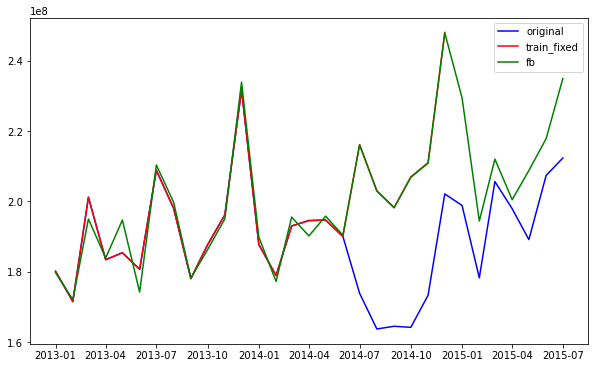

In [792]:
orig_plot = plt.plot(Series_day_to_mon(sales_indexed), color='blue', label='original')
train_plot = plt.plot(Series_day_to_mon(train_fixed), color='red', label='train_fixed')
fb_plot = plt.plot(Series_day_to_mon(y_prediction_indexed), color='green', label='fb')
#final_plot = plt.plot(final_pred, color='red', label='combined')
#Sales_plot = plt.plot(prediction_1_S_1, color='black', label='Predicted-1')
plt.legend(loc="best")
plt.show(block = False)

TypeError: Series_day_to_mon() missing 1 required positional argument: 'Series'